<a href="https://colab.research.google.com/github/aleksejalex/EIEE9E_2024_ZS/blob/main/PyPEF_06_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyPEF, lecture 06. Plots (continued). Handling data in Python.

Prepared by: Aleksej Gaj ( pythonforstudents24@gmail.com )

🔗 Course website: [https://aleksejalex.4fan.cz/pef_python/](https://aleksejalex.4fan.cz/pef_python/)


*Note:* this notebook is partially inspired by [this notebook](https://github.com/janpipek/fbmi-python-course/blob/main/notebooks/130_pandas_intro.ipynb).

In this tutorial we will
 - continue to plot figures in Python:
    - second (more intuitive) way to use `plt.legend()` (via `label`s)
    - subplots ( = how to plot several graphs in one figure)
    - two different ways of plotting
 - learn how to work with data in Python, namely:
    - how `pandas` library stores data
    - how to import data and change it
    - basic functionality of `pandas` library


## Solution of the homework from last time - finale
**task:** compute a mean (cz. *střední hodnota*) and median of each of functions you plotted above. Copy your solution from above and plot a mean value of each function as a red dot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-2-cfdc9e463ebc>:7: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.log(x), label="log")       # note how the legend is constructed here


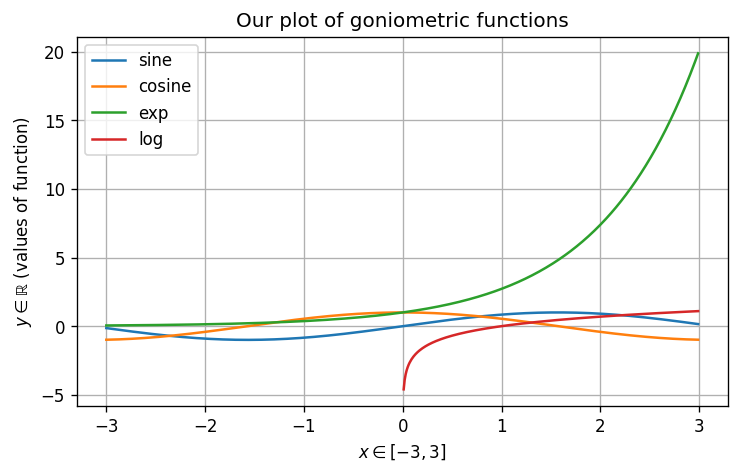

In [2]:
x = np.arange(-3, 3, 0.01)

plt.figure(figsize=(7,4), dpi=120)
plt.plot(x, np.sin(x), label="sine")      # note how the legend is constructed here
plt.plot(x, np.cos(x), label="cosine")    # note how the legend is constructed here
plt.plot(x, np.exp(x), label="exp")       # note how the legend is constructed here
plt.plot(x, np.log(x), label="log")       # note how the legend is constructed here
plt.xlabel(r"$x \in  \left[ -3, 3  \right] $")
plt.ylabel(r"$y \in \mathrm{\mathbb{R}}$ (values of function)")
plt.title(r"Our plot of goniometric functions")
plt.legend()                              # note the legend
plt.grid()
plt.savefig("my_gonio_functions.png", dpi=230)
plt.show()

adding mean and median:

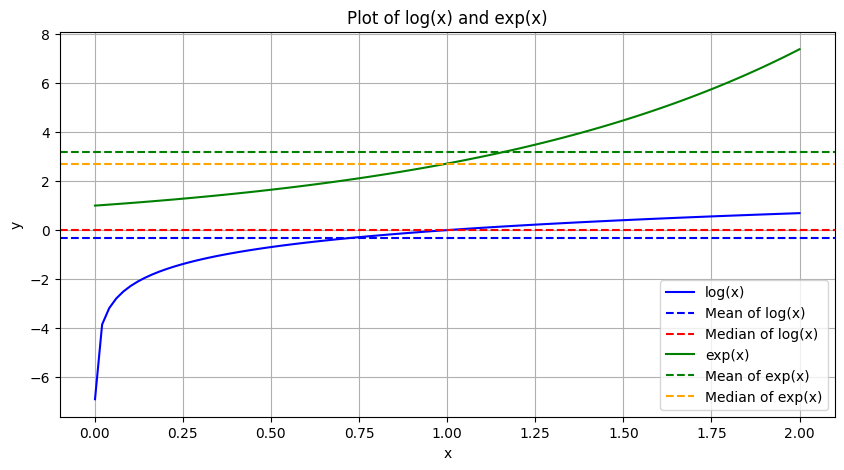

In [3]:

# Define the interval
interval = np.linspace(0.001, 2, 100)

# Calculate np.log and np.exp for the interval
log_values = np.log(interval)
exp_values = np.exp(interval)

# Calculate mean and median
log_mean = np.mean(log_values)
log_median = np.median(log_values)
exp_mean = np.mean(exp_values)
exp_median = np.median(exp_values)

# Plot np.log
plt.figure(figsize=(10, 5))
plt.plot(interval, log_values, label='log(x)', color='blue')
plt.axhline(y=log_mean, color='blue', linestyle='--', label='Mean of log(x)')
plt.axhline(y=log_median, color='red', linestyle='--', label='Median of log(x)')

# Plot np.exp
plt.plot(interval, exp_values, label='exp(x)', color='green')
plt.axhline(y=exp_mean, color='green', linestyle='--', label='Mean of exp(x)')
plt.axhline(y=exp_median, color='orange', linestyle='--', label='Median of exp(x)')

# Set labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of log(x) and exp(x)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

🤔 Why mean and median are different?

## Plots - part 2

 - some other type of plots
 - subplots: several graphs in one figure
 - two ways of plotting in matplotlib: via pyplot (we did it this way until now), and via axis (considered to be "more modern")

Recall plot of sine and cosine functions from the last time:

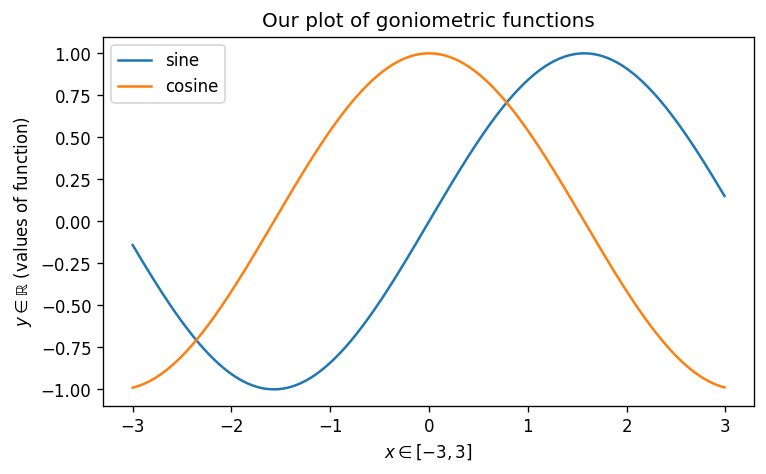

In [4]:
x = np.arange(-3, 3, 0.01)

plt.figure(figsize=(7,4), dpi=120)
plt.plot(x, np.sin(x), label="sine")      # note how the legend is constructed here
plt.plot(x, np.cos(x), label="cosine")    # note how the legend is constructed here
plt.xlabel(r"$x \in  \left[ -3, 3  \right] $")
plt.ylabel(r"$y \in \mathrm{\mathbb{R}}$ (values of function)")
plt.title(r"Our plot of goniometric functions")
plt.legend()                              # note the legend
plt.savefig("my_gonio_functions.png", dpi=230)
plt.show()

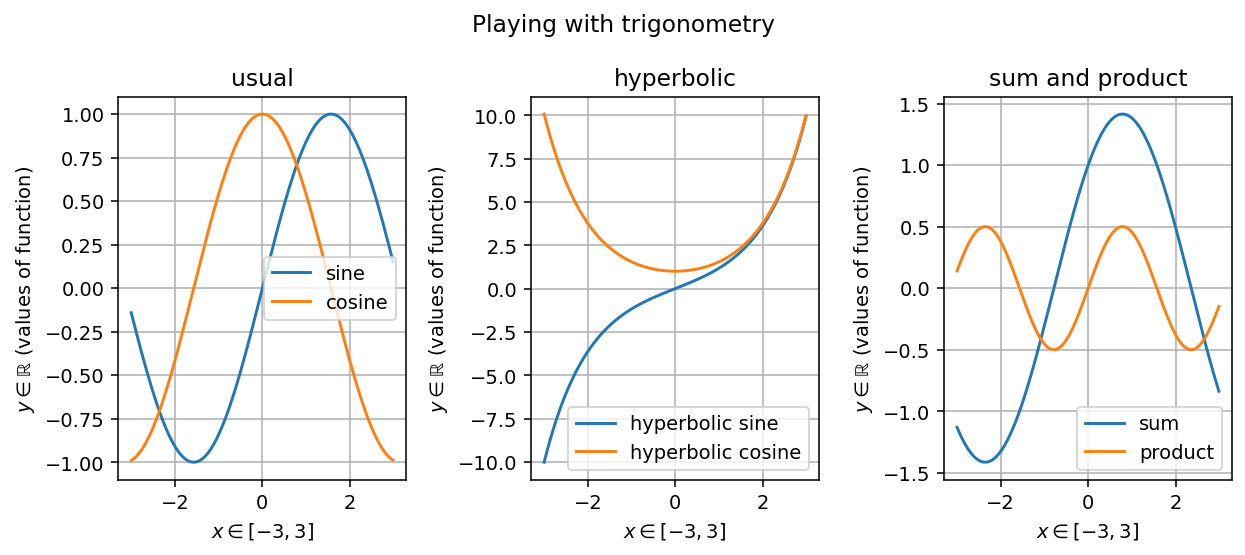

In [5]:
x = np.arange(-3, 3, 0.01)

plt.figure(figsize=(9,4), dpi=140)

plt.subplot(1,3,1)
plt.plot(x, np.sin(x), label="sine")
plt.plot(x, np.cos(x), label="cosine")
plt.xlabel(r"$x \in  \left[ -3, 3  \right] $")
plt.ylabel(r"$y \in \mathrm{\mathbb{R}}$ (values of function)")
plt.title(r"usual")
plt.legend()
plt.grid()

plt.subplot(1,3,2)
plt.plot(x, np.sinh(x), label="hyperbolic sine")
plt.plot(x, np.cosh(x), label="hyperbolic cosine")
plt.xlabel(r"$x \in  \left[ -3, 3  \right] $")
plt.ylabel(r"$y \in \mathrm{\mathbb{R}}$ (values of function)")
plt.title(r"hyperbolic")
plt.legend()
plt.grid()

plt.subplot(1,3,3)
plt.plot(x, np.sin(x) + np.cos(x), label="sum")
plt.plot(x, np.sin(x) * np.cos(x), label="product")
plt.xlabel(r"$x \in  \left[ -3, 3  \right] $")
plt.ylabel(r"$y \in \mathrm{\mathbb{R}}$ (values of function)")
plt.title(r"sum and product")
plt.legend()
plt.grid()

plt.suptitle("Playing with trigonometry")
plt.tight_layout() # adjust layout to prevent overlapping
plt.savefig("my_gonio_functions.png", dpi=230)
plt.show()

### Log scale

<ipython-input-6-d94bb1e50b22>:7: RuntimeWarning: invalid value encountered in log
  y2 = np.log(x)


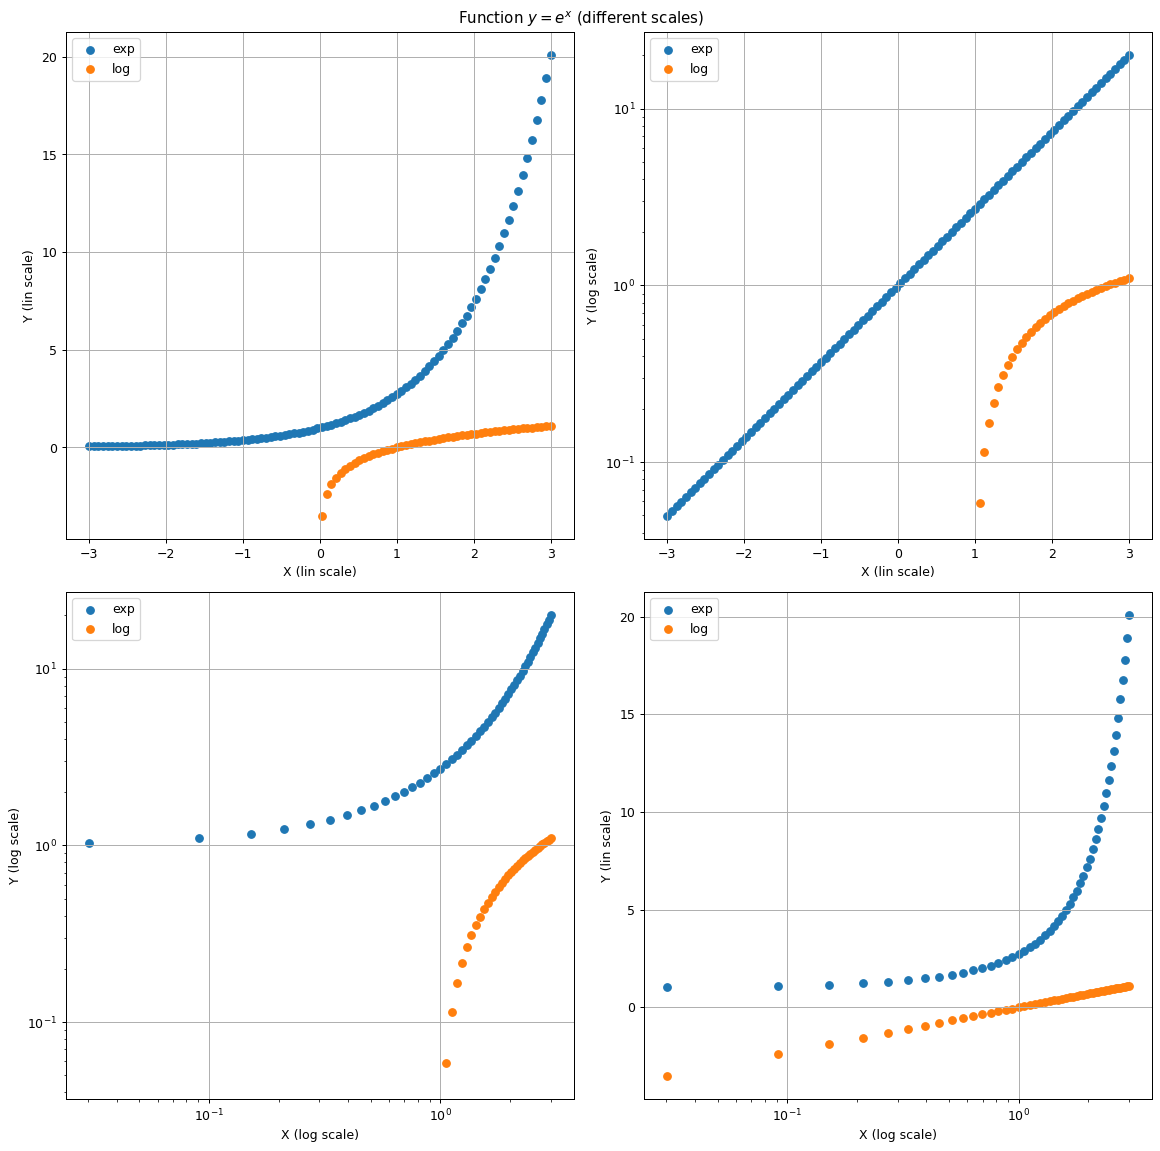

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.linspace(-3,3,100)
y = np.exp(x)
y2 = np.log(x)

# Plot the points with log scale on both axes
plt.figure(figsize=(13,13), dpi=90)
plt.subplot(2,2,1)
plt.scatter(x, y, label="exp")
plt.scatter(x, y2, label="log")
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel('X (lin scale)')
plt.ylabel('Y (lin scale)')
plt.title('')
plt.legend()
plt.grid()

plt.subplot(2,2,2)
plt.scatter(x, y, label="exp")
plt.scatter(x, y2, label="log")
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('X (lin scale)')
plt.ylabel('Y (log scale)')
plt.title('')
plt.legend()
plt.grid()

plt.subplot(2,2,3)
plt.scatter(x, y, label="exp")
plt.scatter(x, y2, label="log")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('X (log scale)')
plt.ylabel('Y (log scale)')
plt.title('')
plt.legend()
plt.grid()

plt.subplot(2,2,4)
plt.scatter(x, y, label="exp")
plt.scatter(x, y2, label="log")
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('X (log scale)')
plt.ylabel('Y (lin scale)')
plt.title('')
plt.legend()
plt.grid()


plt.suptitle(r"Function $y=e^x$ (different scales)")
plt.tight_layout()
plt.show()

⚠️ Note that all points shown **are the same values!** The same `x`,`y` and `y2`.
The difference is just how the points are plotted (or where - in terms of different scales on axes).

### Other types of plots:

#### Histogram (more on histogams later)

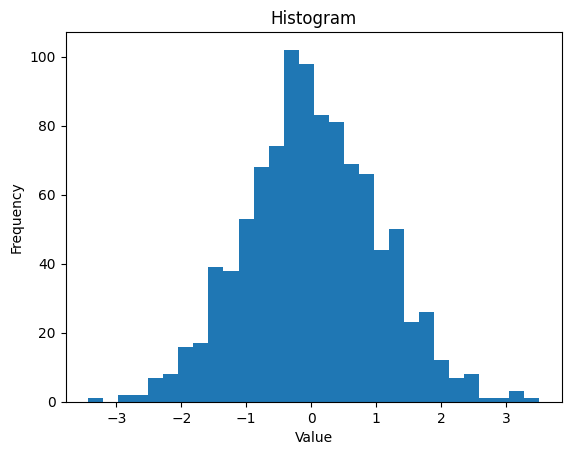

In [7]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randn(1000)  # Generating random data
plt.hist(data, bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

#### Pie chart

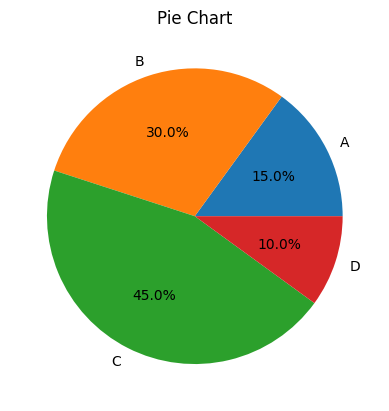

In [8]:
import matplotlib.pyplot as plt

sizes = [15, 30, 45, 10]
labels = ['A', 'B', 'C', 'D']

plt.pie(sizes, labels=labels, autopct='%1.1f%%') # last argument makes the percentages inside figure
plt.title('Pie Chart')
plt.show()


#### 3D plots...
 - here we are forced to use slightly different option of plotting (more on this later)

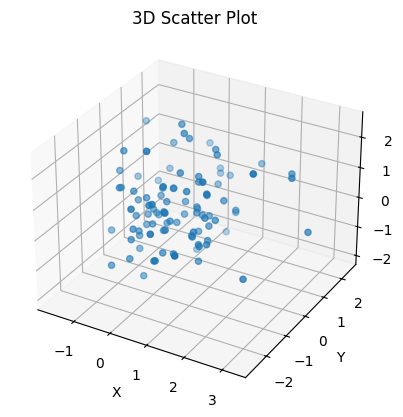

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
z = np.random.standard_normal(100)

ax.scatter(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Scatter Plot')
plt.show()


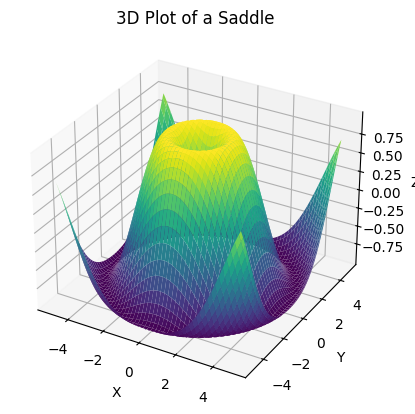

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Define a function to plot
z = x**2 - y**2
z = np.sin(np.sqrt(x**2 + y**2))

# Plot the function
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Plot of a Saddle')
plt.show()


💡 Note: try to run the last cell locally, in your IDE. Locally, the figureis shown in a separate window, where you can rotate and scale it with you mouse.

(This is still very "manual" way of plotting. To make cool interactive figure or animation, expect more tinkering with matplotlib *or* another library).

### Two options to plot plots:

#### 1. using `pyplot` - as we did until now
 - more convenient, simple to use, less customizable  (if it matters)

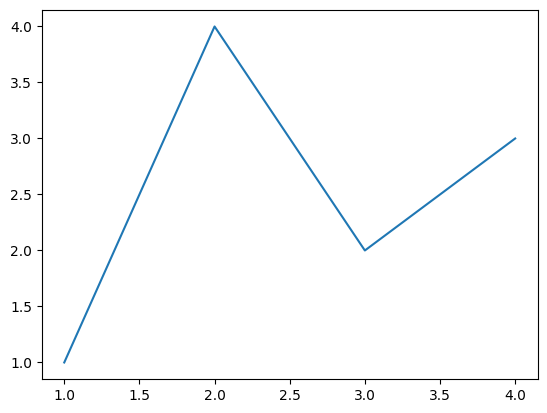

In [11]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

plt.plot(x, y)
plt.show()

In [12]:
print(plt)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>


#### 2. using axis - another option
 - more explicit, object oriented
 - much more options to customize your plot elements and its properties
 - considered to be more modern

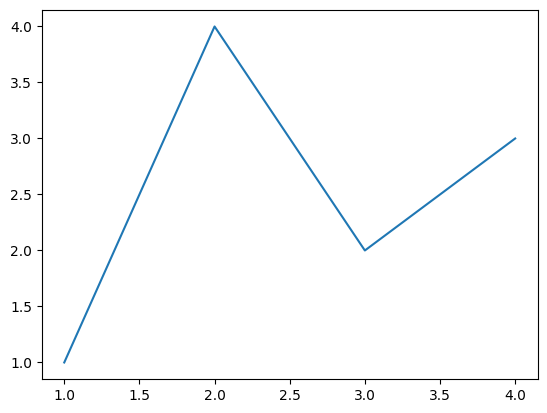

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  # Create a figure containing a single axes.
x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

ax.plot(x, y)  # Plot some data on the axes.
plt.show()

In [14]:
print(ax)
print(type(ax))

Axes(0.125,0.11;0.775x0.77)
<class 'matplotlib.axes._axes.Axes'>


## 📊 Data: blessing and curse

Nowadays, the importance of data is obvious.

When working with data, remember:

1) no perfect data exist: any dataset is obtained as the result of some experiment/observation, so there arise problems like:
   - **missing data**: not every property of every individual was recorded/obtained (*example:* some people prefer not to say their gender)
   - **low quality**: inconsistent values (*How to deal with outliers?*), incorrect formatting, duplicate records,
   - **data imbalance:** definitely not all situations occured, some might be underrepresented/overrepresented (*How it comes NN is rasist*)

2) there are several ways how to analyse the data, and always many ways, how to *interpret* the results:
   - two analysts can deduce different conclusions from *the same data*
   - context (how? why?) matters, but often even client has no clue how the data were observed and what questions are expected to be answered (why?)
   - *analysis of data is more like an art, and interpretation is sometimes close to philosophy*


👉 So:
 - do not analyse data as some kind of routine (unless it is routine): be sure you **understand the phenomena** behind your data and **formulate your task accordingly**
 - try to **get as much context** (additional information) about your data as possible. It might happen that "the mistake" was done already during collecting or preprocessing phase
 - try to get your hands **on raw data** (in many cases wrong preprocessing kills the valuable infomation in the data)



🚨🚨🚨 **Warning:** Data analysis and data science are huge areas comprising interdisciplinatry knowledge in probabilisty, statistics, optimisation, etc and programming art and dark magic. There is no chance to cover even brief introduction in this course. However, we will try to learn *how* to use the most popular tools, expecting you will learn *why* to use them in other tasks (or in others subjects).



Something to avoid:

<img src="https://imgs.xkcd.com/comics/flawed_data.png" alt="logo" width="600">

source: [xkcd.com](https://xkcd.com/)

## Data in Python: pandas
<img src="https://pandas.pydata.org/pandas-docs/stable/_static/pandas.svg" alt="logo" width="200">

 = Python library for data manipulation and analysis

 - nothing in common with 🐼, name is derived from "**pan**el **da**ta" (=econometric term for data sets that include observations over time of the same individuals)




*Reminder of literature:*
 - the book written by the creator of Pandas - Wes McKinney

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fbookshop.vshcdn.net%2Fo-reilly-media%2Fpython-for-data-analysis-2e_id4950739.jpg&f=1&nofb=1&ipt=fb8aa0538b53aaf9640cd8990c0a88041c295a932722edc875cbded4556b5331&ipo=images" alt="logo" width="150">

Now let's get to technicalities.

In [15]:
import pandas as pd

### Basic objects

 - Series
 - DataFrame

#### Series
 = basic element of pandas, similar to array in NumPy

In [16]:
series = pd.Series([101, 102, 103])
series

,0
0,101
1,102
2,103


In [17]:
series.values

array([101, 102, 103])

In [18]:
type(series.values)

numpy.ndarray

Ah! So `pd.Series` is just a wrapper for `np.ndarray`? 🤔

No, there's more: `pd.Series` contains not only the data (as numpy does), but also it assigns some "label" to each row. The "label" is called index

In [19]:
series.index

RangeIndex(start=0, stop=3, step=1)

Index can be used to access some part of `pd.Series`:

In [20]:
series[1]

102

In [21]:
# series from a dictionary
series_ab = pd.Series({"a": 2, "b": 4})
series_ab

,0
a,2
b,4


#### DataFrame
 = something like Excel table 🙂

 ➕ Python friendly (simple interaction with other libraries) \
 ➕ much faster than Excel  \
 ➖ no GUI to edit data (at least not as a part of pandas) \
 ➖ you don't modify the data, you create a copy with modified values  \
 ➖ slow and demanding - whole data need to be loaded into RAM (but still faster than Excel 😜 )

Technically - a collection of named columns (collection of `pd.Series`).

### Main Features of pandas.DataFrame:

1. Tabular Data Structure
2. Data Handling for Heterogeneous Data Types
3. Indexing for Easy Data Access
4. Data Manipulation Functions
5. Missing Data Handling Methods
6. Grouping and Aggregation Capabilities
7. Data Cleaning and Preprocessing Tools
8. Data Import and Export Functions
9. Integration with Data Visualization Libraries

### Comparison with Excel:

| Feature         | pandas.DataFrame                  | MS Excel                                 |
|-----------------|-----------------------------------|---------------------------------------|
| Scalability     | Efficient for Larger Datasets     | Limited by Memory                     |
| Control         | Programmatic Automation           | Manual Operations                     |
| Performance     | Better for Complex Operations     | Slower for Large Datasets             |
| Integration     | Seamless with Python Ecosystem    | Standalone Application                |
| Customization   | Extensive Flexibility             | Limited to Built-in Functions         |


Back to code: ways to create dataframe "by hand":

In [22]:
# specify columns as 'pd.Series':
df = pd.DataFrame({
    'number': pd.Series([1, 2, 3, 4], dtype = np.int64),
    'letter': pd.Series(['a', 'b', 'c', 'd'])
})
df

,number,letter
0,1,a
1,2,b
2,3,c
3,4,d


In [23]:
# create dataframe from `dict`:
df_cars = pd.DataFrame(
    {
        "name": ['Audi', 'BMW', 'Citroen'],
        "age": [8, 12, 1],
        "used": [True, True, False],
        "price": [10000, 25000, 11000]
    }
)

df_cars

,name,age,used,price
0,Audi,8,True,10000
1,BMW,12,True,25000
2,Citroen,1,False,11000


Let's check type of variables in df:

In [24]:
df_cars.dtypes

,0
name,object
age,int64
used,bool
price,int64


In [25]:
df_cars.shape

(3, 4)

In [26]:
df_cars.set_index('name', inplace=True)

In [27]:
df_cars

,age,used,price
name,,,
Audi,8,True,10000
BMW,12,True,25000
Citroen,1,False,11000


Different way how to create an index when creating a df:

In [28]:
df_cars = pd.DataFrame(
    {
        "name": ['Audi', 'BMW', 'Citroen'],
        "age": [8, 12, 1],
        "used": [True, True, False],
        "price": [10000, 25000, 11000]
    }, index = ['car1', 'car2', 'car3']   # note the index we specify
)

df_cars

,name,age,used,price
car1,Audi,8,True,10000
car2,BMW,12,True,25000
car3,Citroen,1,False,11000


Now the "individuals" are indexed not via numbers, but via our own indexes.

### How to access elements?

There are two ways how to access them:
 - using `loc` function for label-based indexing
 - using `iloc` for order-based indexing

❗ Note the square brackets:


In [29]:
df_cars.loc["car1"]

,car1
name,Audi
age,8
used,True
price,10000


In [30]:
df_cars.iloc[0]  # first entry is Audi

,car1
name,Audi
age,8
used,True
price,10000


How to write out a single column form df?

In [31]:
df_cars["price"]

,price
car1,10000
car2,25000
car3,11000


The column should be `pd.Series`, right?

In [32]:
type(df_cars["price"])

pandas.core.series.Series

### Importing data to pandas

 - in pandas I/O is very simple and convenient. You can import (and export) to huge amount of formats:

| File Format            | Short Comment                                     | Example Command                                   |
|------------------------|---------------------------------------------------|---------------------------------------------------|
| CSV (Comma-Separated Values) | Common text-based format for tabular data.   | `pd.read_csv('data.csv')`                     |
| Excel Spreadsheet     | Popular format for storing data in sheets.         | `pd.read_excel('data.xlsx')`                      |
| JSON (JavaScript Object Notation) | Lightweight data interchange format.        | `pd.read_json('data.json')`                     |
| SQL Database           | Import data from SQL databases using SQLAlchemy.   | `pd.read_sql('SELECT * FROM table_name', connection)` |
| HTML tables            | Extract tables from HTML documents.                | `pd.read_html('page.html')`                      |
| HDF5 (hierarchical data format version 5) | Designed for storing large amounts of data. | `pd.read_hdf('data.h5', 'key')`                   |
| Feather                | Fast, lightweight binary columnar data format.     | `pd.read_feather('data.feather')`                |
| Parquet                | Columnar storage format optimized for analytics.   | `pd.read_parquet('data.parquet')`                |
| Msgpack                | Efficient binary serialization format.             | `pd.read_msgpack('data.msgpack')`                |
| Stata                  | Popular format for social science research data.   | `pd.read_stata('data.dta')`                      |
| SAS                    | Statistical Analysis System format.                | `pd.read_sas('data.sas7bdat')`                   |
| SPSS                   | Statistical Package for the Social Sciences format.| `pd.read_spss('data.sav')`                       |
| Google BigQuery        | Import data from Google BigQuery database tables.  | `pd.read_gbq('SELECT * FROM table_name', project_id)` |


Let's try it:
 - create `.csv` file (for simplicity we will use magic of jupyter notebooks, but locally you can import any local file)
 - load in pandas
 - print it out

(source: [Kaggle](https://www.kaggle.com/datasets/crawford/80-cereals))

In [33]:
%%writefile cereals.csv
name,mfr,type_of,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541
Apple Jacks,K,C,110,2,0,125,1,11,14,30,25,2,1,1,33.174094
Basic 4,G,C,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.038562
Bran Chex,R,C,90,2,1,200,4,15,6,125,25,1,1,0.67,49.120253
Bran Flakes,P,C,90,3,0,210,5,13,5,190,25,3,1,0.67,53.313813
Cap'n'Crunch,Q,C,120,1,2,220,0,12,12,35,25,2,1,0.75,18.042851
Cheerios,G,C,110,6,2,290,2,17,1,105,25,1,1,1.25,50.764999
Cinnamon Toast Crunch,G,C,120,1,3,210,0,13,9,45,25,2,1,0.75,19.823573
Clusters,G,C,110,3,2,140,2,13,7,105,25,3,1,0.5,40.400208
Cocoa Puffs,G,C,110,1,1,180,0,12,13,55,25,2,1,1,22.736446
Corn Chex,R,C,110,2,0,280,0,22,3,25,25,1,1,1,41.445019
Corn Flakes,K,C,100,2,0,290,1,21,2,35,25,1,1,1,45.863324
Corn Pops,K,C,110,1,0,90,1,13,12,20,25,2,1,1,35.782791
Count Chocula,G,C,110,1,1,180,0,12,13,65,25,2,1,1,22.396513
Cracklin' Oat Bran,K,C,110,3,3,140,4,10,7,160,25,3,1,0.5,40.448772
Cream of Wheat (Quick),N,H,100,3,0,80,1,21,0,-1,0,2,1,1,64.533816
Crispix,K,C,110,2,0,220,1,21,3,30,25,3,1,1,46.895644
Crispy Wheat & Raisins,G,C,100,2,1,140,2,11,10,120,25,3,1,0.75,36.176196
Double Chex,R,C,100,2,0,190,1,18,5,80,25,3,1,0.75,44.330856
Froot Loops,K,C,110,2,1,125,1,11,13,30,25,2,1,1,32.207582
Frosted Flakes,K,C,110,1,0,200,1,14,11,25,25,1,1,0.75,31.435973
Frosted Mini-Wheats,K,C,100,3,0,0,3,14,7,100,25,2,1,0.8,58.345141
Fruit & Fibre Dates Walnuts and Oats,P,C,120,3,2,160,5,12,10,200,25,3,1.25,0.67,40.917047
Fruitful Bran,K,C,120,3,0,240,5,14,12,190,25,3,1.33,0.67,41.015492
Fruity Pebbles,P,C,110,1,1,135,0,13,12,25,25,2,1,0.75,28.025765
Golden Crisp,P,C,100,2,0,45,0,11,15,40,25,1,1,0.88,35.252444
Golden Grahams,G,C,110,1,1,280,0,15,9,45,25,2,1,0.75,23.804043
Grape Nuts Flakes,P,C,100,3,1,140,3,15,5,85,25,3,1,0.88,52.076897
Grape-Nuts,P,C,110,3,0,170,3,17,3,90,25,3,1,0.25,53.371007
Great Grains Pecan,P,C,120,3,3,75,3,13,4,100,25,3,1,0.33,45.811716
Honey Graham Ohs,Q,C,120,1,2,220,1,12,11,45,25,2,1,1,21.871292
Honey Nut Cheerios,G,C,110,3,1,250,1.5,11.5,10,90,25,1,1,0.75,31.072217
Honey-comb,P,C,110,1,0,180,0,14,11,35,25,1,1,1.33,28.742414
Just Right Crunchy  Nuggets,K,C,110,2,1,170,1,17,6,60,100,3,1,1,36.523683
Just Right Fruit & Nut,K,C,140,3,1,170,2,20,9,95,100,3,1.3,0.75,36.471512
Kix,G,C,110,2,1,260,0,21,3,40,25,2,1,1.5,39.241114
Life,Q,C,100,4,2,150,2,12,6,95,25,2,1,0.67,45.328074
Lucky Charms,G,C,110,2,1,180,0,12,12,55,25,2,1,1,26.734515
Maypo,A,H,100,4,1,0,0,16,3,95,25,2,1,1,54.850917
Muesli Raisins Dates & Almonds,R,C,150,4,3,95,3,16,11,170,25,3,1,1,37.136863
Muesli Raisins Peaches & Pecans,R,C,150,4,3,150,3,16,11,170,25,3,1,1,34.139765
Mueslix Crispy Blend,K,C,160,3,2,150,3,17,13,160,25,3,1.5,0.67,30.313351
Multi-Grain Cheerios,G,C,100,2,1,220,2,15,6,90,25,1,1,1,40.105965
Nut&Honey Crunch,K,C,120,2,1,190,0,15,9,40,25,2,1,0.67,29.924285
Nutri-Grain Almond-Raisin,K,C,140,3,2,220,3,21,7,130,25,3,1.33,0.67,40.692320
Nutri-grain Wheat,K,C,90,3,0,170,3,18,2,90,25,3,1,1,59.642837
Oatmeal Raisin Crisp,G,C,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.5,30.450843
Post Nat. Raisin Bran,P,C,120,3,1,200,6,11,14,260,25,3,1.33,0.67,37.840594
Product 19,K,C,100,3,0,320,1,20,3,45,100,3,1,1,41.503540
Puffed Rice,Q,C,50,1,0,0,0,13,0,15,0,3,0.5,1,60.756112
Puffed Wheat,Q,C,50,2,0,0,1,10,0,50,0,3,0.5,1,63.005645
Quaker Oat Squares,Q,C,100,4,1,135,2,14,6,110,25,3,1,0.5,49.511874
Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1,-1,110,0,1,1,0.67,50.828392
Raisin Bran,K,C,120,3,1,210,5,14,12,240,25,2,1.33,0.75,39.259197
Raisin Nut Bran,G,C,100,3,2,140,2.5,10.5,8,140,25,3,1,0.5,39.703400
Raisin Squares,K,C,90,2,0,0,2,15,6,110,25,3,1,0.5,55.333142
Rice Chex,R,C,110,1,0,240,0,23,2,30,25,1,1,1.13,41.998933
Rice Krispies,K,C,110,2,0,290,0,22,3,35,25,1,1,1,40.560159
Shredded Wheat,N,C,80,2,0,0,3,16,0,95,0,1,0.83,1,68.235885
Shredded Wheat'n'Bran,N,C,90,3,0,0,4,19,0,140,0,1,1,0.67,74.472949
Shredded Wheat spoon size,N,C,90,3,0,0,3,20,0,120,0,1,1,0.67,72.801787
Smacks,K,C,110,2,1,70,1,9,15,40,25,2,1,0.75,31.230054
Special K,K,C,110,6,0,230,1,16,3,55,25,1,1,1,53.131324
Strawberry Fruit Wheats,N,C,90,2,0,15,3,15,5,90,25,2,1,1,59.363993
Total Corn Flakes,G,C,110,2,1,200,0,21,3,35,100,3,1,1,38.839746
Total Raisin Bran,G,C,140,3,1,190,4,15,14,230,100,3,1.5,1,28.592785
Total Whole Grain,G,C,100,3,1,200,3,16,3,110,100,3,1,1,46.658844
Triples,G,C,110,2,1,250,0,21,3,60,25,3,1,0.75,39.106174
Trix,G,C,110,1,1,140,0,13,12,25,25,2,1,1,27.753301
Wheat Chex,R,C,100,3,1,230,3,17,3,115,25,1,1,0.67,49.787445
Wheaties,G,C,100,3,1,200,3,17,3,110,25,1,1,1,51.592193
Wheaties Honey Gold,G,C,110,2,1,200,1,16,8,60,25,1,1,0.75,36.187559

Writing cereals.csv


In [34]:
df_cereals = pd.read_csv("cereals.csv", delimiter=',')
df_cereals.head()

,name,mfr,type_of,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Impractical, right? Luckily pandas can directly read from weblink:

In [35]:
del df_cereals

df_cereals = pd.read_csv("https://gist.githubusercontent.com/aleksejalex/26a83646c03120af1eaeb117572d895e/raw/2ddc8661d86fbf1b7d09204ff39fdf74ce3723b6/cereals.csv", delimiter=',')
df_cereals.head()

,name,mfr,type_of,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Now let's have a little fun with those data:

### Show the data:

In [36]:
df_cereals.head(8)

,name,mfr,type_of,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562


### Check for types and retype if needed

In [37]:
df_cereals.dtypes

,0
name,object
mfr,object
type_of,object
calories,int64
protein,int64
fat,int64
sodium,int64
fiber,float64
carbo,float64
sugars,int64


In [38]:
df_cereals["calories"] = df_cereals["calories"].astype('float')

In [39]:
df_cereals["type_of"] = df_cereals["type_of"].astype("category")

In [40]:
df_cereals.dtypes

,0
name,object
mfr,object
type_of,category
calories,float64
protein,int64
fat,int64
sodium,int64
fiber,float64
carbo,float64
sugars,int64


### Know your data - basic statistics

In [41]:
df_cereals.describe(include='all')

,name,mfr,type_of,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


### plot your data:

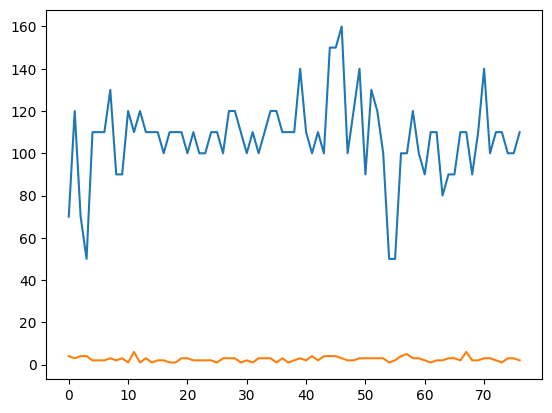

In [42]:
plt.figure()
plt.plot(df_cereals["calories"], label="calories")
plt.plot(df_cereals["protein"], label="proteins")
plt.show()

## Optional homework: 2 alternatives:


### Option 1: work with your own data
**task:** Create a dataframe, containing some of your subjects. Each subject should have these properties: shortcut, number of credits, boolean value if it's optional or obligatory, and room number where lectures takes place (for example for E455 `room=455`).

1) create such dataframe
2) compute basic statistics (average amount of credits? do you have more optional subjects than obligatory? how often do you visit odd floors for lectures?) consider writing simple functions for some of questions. Feel free to answer your own questions about your data.
3) make basic plots. Consider which variables makes sense to plot and how. Use subplots if it makes sense.

### Option 2: work withcereals data
**task:** same as above, but for cereals dataset.